# About DataSet

# Loading Dataset - titanic_train.csv

In [269]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
df.head() #Printing first 5 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
#checking the dataset dimension
df.shape

(891, 12)

# Preparing Dataset

In [271]:
#Checking datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [272]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [273]:
#Checking for unique values in Name, Sex, Ticket, Cabin and Embarked before encoding
feature = ['Name','Sex','Ticket','Cabin','Embarked']
for x in feature:
    print(f'{x}\t\t: {len(df[x].unique())}')

Name		: 891
Sex		: 2
Ticket		: 681
Cabin		: 148
Embarked		: 4


In [274]:
#Encoding Column Sex and Embarked with the help of LabelEncoder from preprocessing.
from sklearn.preprocessing import LabelEncoder

df_new = df.copy()
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [275]:
#Encoding Sex Column
le_sex = LabelEncoder()
df_new['Sex'] = le_sex.fit_transform(df_new['Sex'])
le_sex.classes_

array(['female', 'male'], dtype=object)

In [276]:
#Handling null value and encoding column Embarked
import numpy as np
df_new['Embarked'] = df_new['Embarked'].replace(np.nan,df_new['Embarked'].mode()[0]) #replacing null value with mode value

le_embarked = LabelEncoder()
df_new['Embarked'] = le_embarked.fit_transform(df_new['Embarked'])
le_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [277]:
#Print 10 rows of new dataset after encoding
df_new.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0


In [278]:
#Checking and handling NaN values of column Age
df_new['Age'] = df_new['Age'].replace(np.nan,df_new['Age'].median()) #replacing NaN value with median value
df_new['Age'].isnull().sum()

0

In [279]:
#Dropping column Name, Ticket & Cabin from dataset
df_new.drop(columns=['Name','Ticket','Cabin'],inplace=True)
df_new.head() #Printing new dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [280]:
#Statistical Summary of Dataset
df_new.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Exploratory Data Analysis (EDA)

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

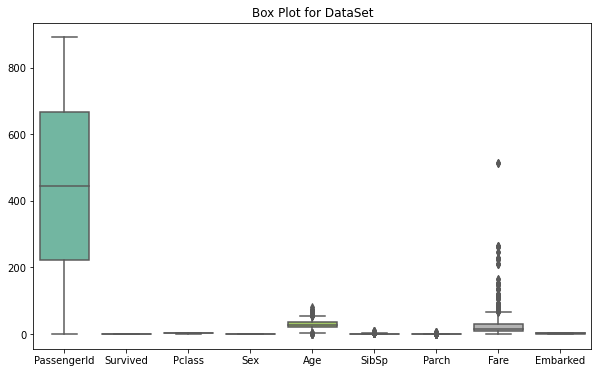

In [282]:
#Checking outliers with the help of box-plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_new, orient='v', palette='Set2')
plt.title('Box Plot for DataSet')
plt.show()

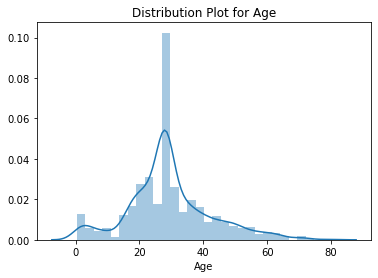

In [283]:
#Checking data distribution using distplot for Age
sns.distplot(df_new['Age'])
plt.title('Distribution Plot for Age')
plt.show()

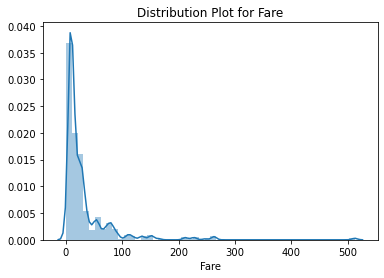

In [284]:
#Checking data distribution using distplot for Fare
sns.distplot(df_new['Fare'])
plt.title('Distribution Plot for Fare')
plt.show()

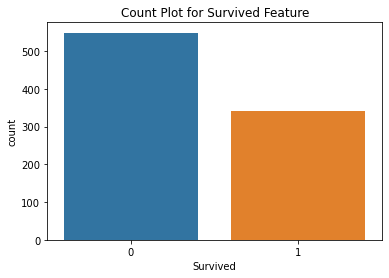

0 - No. of not survived passengers: 549
1 - No. of survived passengers    : 342


In [285]:
#Checking Survived with countplot
sns.countplot(x='Survived',data=df_new)
plt.title("Count Plot for Survived Feature")
plt.show()
print(f'0 - No. of not survived passengers: {df_new["Survived"].value_counts()[0]}')
print(f'1 - No. of survived passengers    : {df_new["Survived"].value_counts()[1]}')

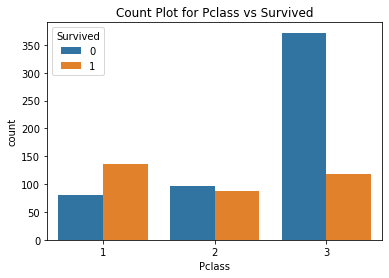

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [286]:
#Checking Pclass and Survived with count plot
sns.countplot(data=df_new, x='Pclass', hue='Survived')
plt.title('Count Plot for Pclass vs Survived')
plt.show()

#Checking with the help of crosstab
pd.crosstab(df_new["Pclass"],df_new["Survived"])

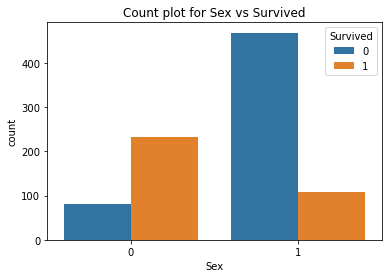

Survived,0,1
Sex,,
0,81,233
1,468,109


In [287]:
#Checking Sex and Survived feature with count plot
sns.countplot(data=df_new, x='Sex', hue='Survived')
plt.title("Count plot for Sex vs Survived")
plt.show()

#Checking with crosstab
pd.crosstab(df_new["Sex"],df_new["Survived"])

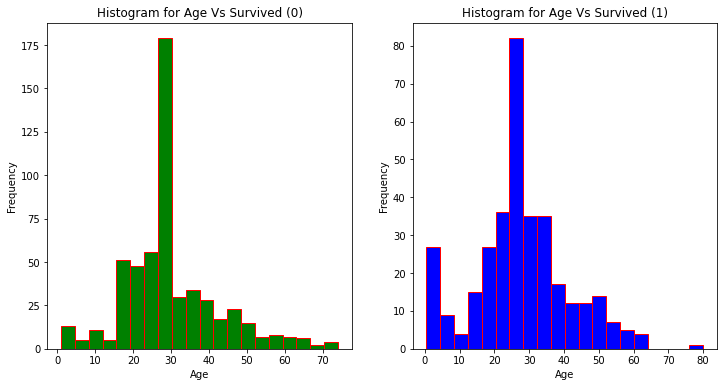

In [288]:
#Checking Age and Survived with histogram
fig, axes = plt.subplots(1,2,figsize=(12,6))
df_new[df_new["Survived"]==0]["Age"].plot.hist(ax=axes[0],edgecolor='r',color='g', bins=20)
axes[0].set_title('Histogram for Age Vs Survived (0)')
axes[0].set_xlabel('Age')

df_new[df_new['Survived']==1]["Age"].plot.hist(ax=axes[1],edgecolor='r',color='b', bins=20)
axes[1].set_title("Histogram for Age Vs Survived (1)")
axes[1].set_xlabel("Age")
plt.show()

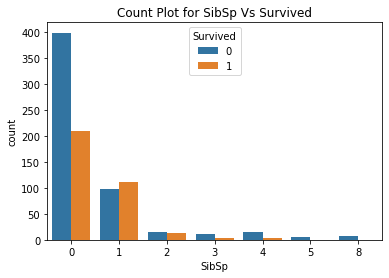

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [289]:
#Checking SibSp and Survived with countplot
sns.countplot(data=df_new, x='SibSp', hue='Survived')
plt.title('Count Plot for SibSp Vs Survived')
plt.show()

#Checking with crosstab
pd.crosstab(df_new["SibSp"],df_new['Survived'])

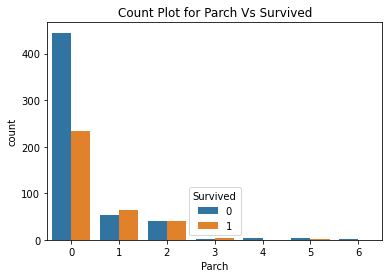

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [290]:
#Checking Parch and Survived with Count Plot
sns.countplot(data=df_new, x='Parch', hue='Survived')
plt.title('Count Plot for Parch Vs Survived')
plt.show()

#Checking with crosstab
pd.crosstab(df_new['Parch'],df_new["Survived"])

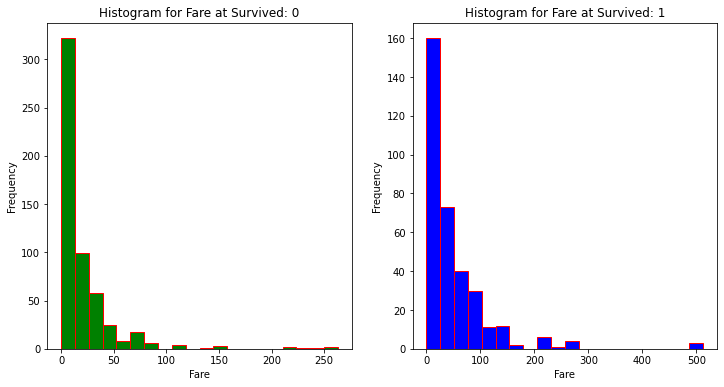

In [291]:
#Checking Fare and Survived with histogram.
fig, axes = plt.subplots(1,2,figsize=(12,6))
df_new[df_new["Survived"]==0]["Fare"].plot.hist(ax=axes[0],edgecolor='r',color='g', bins=20)
axes[0].set_title('Histogram for Fare at Survived: 0')
axes[0].set_xlabel('Fare')

df_new[df_new["Survived"]==1]["Fare"].plot.hist(ax=axes[1],edgecolor='r',color='b', bins=20)
axes[1].set_title("Histogram for Fare at Survived: 1")
axes[1].set_xlabel('Fare')

plt.show()

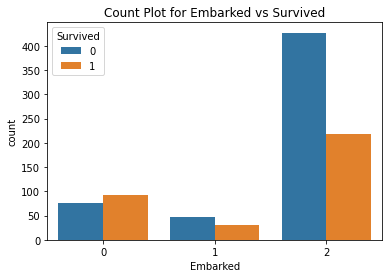

Survived,0,1
Embarked,,
0,75,93
1,47,30
2,427,219


In [292]:
#Checking Embarked and Survived with Count Plot
sns.countplot(data=df_new, x='Embarked', hue='Survived')
plt.title('Count Plot for Embarked vs Survived')
plt.show()

#Checking with crosstab
pd.crosstab(df_new["Embarked"],df_new["Survived"])

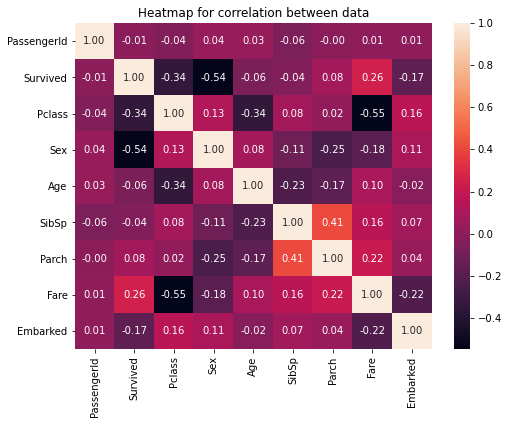

In [293]:
#Checking correlation between data using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,annot=True,fmt=".2f")
plt.title('Heatmap for correlation between data')
plt.show()

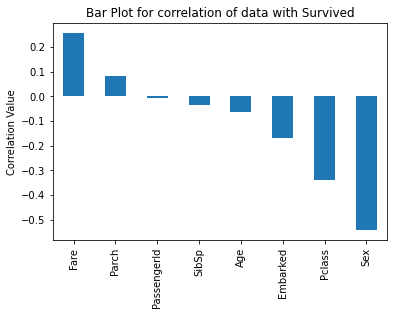

In [294]:
#Checking correlation with the help of bar plot
df_corr["Survived"].sort_values(ascending=False).drop(['Survived']).plot.bar()
plt.title('Bar Plot for correlation of data with Survived')
plt.ylabel('Correlation Value')
plt.show()

# Removing Outliers

In [295]:
#Checking with zscore
from scipy.stats import zscore
z = np.abs(zscore(df_new))
np.where(z>3) #Checking for possible outliers

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
        7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
        6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
        5, 5, 4, 6, 5, 6], dtype=int64))

In [296]:
#Removing outliers
df_new_wo = df_new[(z<3).all(axis=1)]

In [297]:
#Comparing dataset
print(f'Original: {df_new.shape},\t New: {df_new_wo.shape},\t LOSS: {(len(df_new)-len(df_new_wo))*100/len(df_new)}%')

Original: (891, 9),	 New: (820, 9),	 LOSS: 7.968574635241302%


# Skewness

In [298]:
#checking skewness in dataset
df_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

# Preparing Data for Model

In [299]:
x = df_new.drop(columns=['Survived'])
y = df_new["Survived"]
print(x.shape)
print(y.shape)

(891, 8)
(891,)


In [300]:
#Handling skewness of data using power_transform
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [301]:
#Scaling training data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)

In [302]:
#Spliting data for model using train test split and finding best random_state using LogisticClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#Best random_state
lr = LogisticRegression()
best_acscore = 0
best_rstate = 0
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_y = lr.predict(x_test)
    temp_acscore = accuracy_score(y_test,lr_predict_y)
    if temp_acscore>best_acscore:
        best_acscore = temp_acscore
        best_rstate = i
        
print(f'Best random_state: {best_rstate} found with best accuracy_score: {best_acscore}')

Best random_state: 710 found with best accuracy_score: 0.8834080717488789


# Spliting the train test data with random_state = 710

In [303]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=710)

# Finding the best model

In [304]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. LogisticRegression

In [305]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
Lr_predict_y = Lr.predict(x_test)
Lr_aScore = accuracy_score(y_test,Lr_predict_y)
Lr_cMatrix = confusion_matrix(y_test,Lr_predict_y)
Lr_cReport = classification_report(y_test,Lr_predict_y)

print(f'Accuracy Score: {Lr_aScore}')

print(f'------------------')
print(f' Confusion Matrix')
print(f'------------------')
print(Lr_cMatrix)

print(f'-----------------------')
print(f' Classification Report')
print(f'-----------------------')
print(Lr_cReport)

Accuracy Score: 0.8834080717488789
------------------
 Confusion Matrix
------------------
[[129  11]
 [ 15  68]]
-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       140
           1       0.86      0.82      0.84        83

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



# 2. GaussianNB

In [306]:
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()
Gnb.fit(x_train,y_train)
Gnb_predict_y = Gnb.predict(x_test)

Gnb_aScore = accuracy_score(y_test,Gnb_predict_y)
Gnb_cMatrix = confusion_matrix(y_test,Gnb_predict_y)
Gnb_cReport = classification_report(y_test,Gnb_predict_y)

print(f'Accuracy Score: {Gnb_aScore}')

print('------------------')
print(' Confusion Matrix')
print('------------------')
print(Gnb_cMatrix)

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Gnb_cReport)

Accuracy Score: 0.8475336322869955
------------------
 Confusion Matrix
------------------
[[119  21]
 [ 13  70]]
-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       140
           1       0.77      0.84      0.80        83

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.84       223
weighted avg       0.85      0.85      0.85       223



# 3. SVC

In [307]:
from sklearn.svm import SVC
Svc = SVC()
Svc.fit(x_train,y_train)
Svc_predict_y = Svc.predict(x_test)

Svc_aScore = accuracy_score(y_test,Svc_predict_y)
Svc_cMatrix = confusion_matrix(y_test,Svc_predict_y)
Svc_cReport = classification_report(y_test,Svc_predict_y)

print(f'Accuracy Score: {Svc_aScore}')

print('------------------')
print(' Confusion Matrix')
print('------------------')
print(Svc_cMatrix)

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Svc_cReport)

Accuracy Score: 0.8699551569506726
------------------
 Confusion Matrix
------------------
[[135   5]
 [ 24  59]]
-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       140
           1       0.92      0.71      0.80        83

    accuracy                           0.87       223
   macro avg       0.89      0.84      0.85       223
weighted avg       0.88      0.87      0.87       223



# 4.DecisionTreeClassifier

In [308]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc_predict_y = Dtc.predict(x_test)

Dtc_aScore = accuracy_score(y_test,Dtc_predict_y)
Dtc_cMatrix = confusion_matrix(y_test,Dtc_predict_y)
Dtc_cReport = classification_report(y_test,Dtc_predict_y)

print(f'Accuracy Score: {Dtc_aScore}')

print('------------------')
print(' Confusion Matrix')
print('------------------')
print(Dtc_cMatrix)

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Dtc_cReport)

Accuracy Score: 0.7802690582959642
------------------
 Confusion Matrix
------------------
[[115  25]
 [ 24  59]]
-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       140
           1       0.70      0.71      0.71        83

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



# From above model, LogisticRegression is performing well with accuracy_score = 88.34%, so, proceeding with LogisticRegression

# HyperTuning Parameters

In [309]:
#Checking for best cv
from sklearn.model_selection import GridSearchCV, cross_val_score
best_cv = 0
best_cvscore = 0
for i in range(2,20):
    temp_cvscore = cross_val_score(LogisticRegression(),x_train,y_train,cv=i).mean()
    if temp_cvscore>best_cvscore:
        best_cvscore = temp_cvscore
        best_cv = i
        
print(f'Best cv: {best_cv} with best cross_val_score: {best_cvscore}')

Best cv: 16 with best cross_val_score: 0.7680749128919862


In [310]:
#Hypertuning parameters with cv=16
parameters = {
    "solver": ['newton-cg','lbfgs','liblinear','sag','saga'],
    "max_iter": [100,200,300,400,500]
}

gscv_Lr = GridSearchCV(LogisticRegression(),parameters,cv=16)
gscv_Lr.fit(x_train,y_train)

gscv_Lr.best_params_

{'max_iter': 100, 'solver': 'newton-cg'}

In [311]:
#Checking the model performance with best params
gscv_Lr_predict_y = gscv_Lr.best_estimator_.predict(x_test)

gscv_Lr_aScore = accuracy_score(y_test,gscv_Lr_predict_y)
gscv_Lr_cMatrix = confusion_matrix(y_test,gscv_Lr_predict_y)
gscv_Lr_cReport = classification_report(y_test,gscv_Lr_predict_y)

print(f'Final Model Accuracy: {gscv_Lr_aScore}')

print('------------------')
print(' Confusion Matrix')
print('------------------')
print(gscv_Lr_cMatrix)

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(gscv_Lr_cReport)

Final Model Accuracy: 0.8834080717488789
------------------
 Confusion Matrix
------------------
[[129  11]
 [ 15  68]]
-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       140
           1       0.86      0.82      0.84        83

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



# Saving the Model or Serialization

In [312]:
import joblib
filename = 'titanic_project_model.pkl'
joblib.dump(gscv_Lr.best_estimator_,open(filename,'wb'))

# Conclusion

In [313]:
cnc = {"Original":np.array(y_test), "Predicted":np.array(gscv_Lr_predict_y)}
cnc_df = pd.DataFrame(cnc)
cnc_df

,Original,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
218,0,0
219,0,0
220,0,0
221,0,0


In [ ]:
Remarks:
    -Table shows the original target value and predicted target value.